# Чтение данных

In [6]:
import pandas as pd
import googlemaps
from itertools import tee
import numpy as np

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import loadtxt

%matplotlib inline

In [8]:
places = pd.read_csv('places.csv')
places

,Unnamed: 0,part1,part2,part3,Latitude,Longitude
0,0,16-я Парковая улица,NaN,NaN,55.801469,37.829487
1,1,1-й Паловский переулок,NaN,NaN,55.716500,37.631080
2,2,1-я Аэропортовская улица,NaN,NaN,55.800940,37.536184
3,3,1-я Владимирская улица,NaN,NaN,55.753999,37.777209
4,4,1-я Вольская улица,NaN,NaN,55.683334,37.921765
...,...,...,...,...,...,...
460,460,Ярославское шоссе,6,NaN,55.902848,37.760847
461,461,Ярцевская улица,NaN,NaN,55.740173,37.415197
462,462,Ясеневая улица,31,NaN,55.605198,37.738054
463,463,Ясеневая улица,39,NaN,55.606345,37.741936


In [9]:
Y = places['Latitude'].to_numpy()
X = places['Longitude'].to_numpy()

In [10]:
#считываем матрицу расстояние и времени
distance_matrix = np.loadtxt('distances.csv', delimiter=',')
duration_matrix = np.loadtxt('durations.csv', delimiter=',')

In [11]:
distance_matrix[:7,:7]

array([[    0., 23276., 32470.,  8352., 20255., 23330., 53367.],
       [20056.,     0., 18473., 13610., 25605., 15152., 15827.],
       [43738., 15213.,     0., 20423., 32418.,  9646., 21815.],
       [ 8489., 17469., 20455.,     0., 19293., 17791., 29400.],
       [20999., 25373., 32785., 20727.,     0., 39275., 41856.],
       [23148., 15843.,  9732., 18880., 30875.,     0., 25415.],
       [54524., 13123., 21523., 27995., 47181., 25936.,     0.]])

# Расположение точек на карте

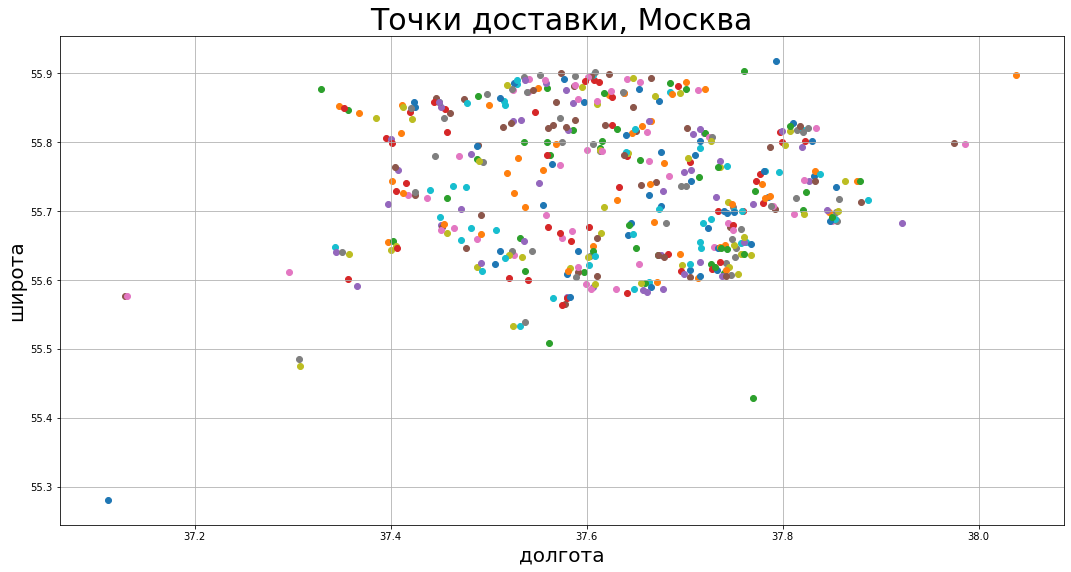

In [12]:
plt.figure(figsize = (18,9))
for x,y in zip(X,Y):
    if (x < 40)&(x>37):
        plt.scatter(x,y)
plt.title('Точки доставки, Москва', fontsize=30)
plt.grid()
plt.xlabel('долгота', fontsize=20)
plt.ylabel('широта', fontsize=20)

plt.show()

# Кластеризация точек доставки пример для k = 20

In [13]:
k = 20
t = distance_matrix[:k,:k]

In [14]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(t)
m3 = kmeans.labels_

Text(0, 0.5, 'широта')

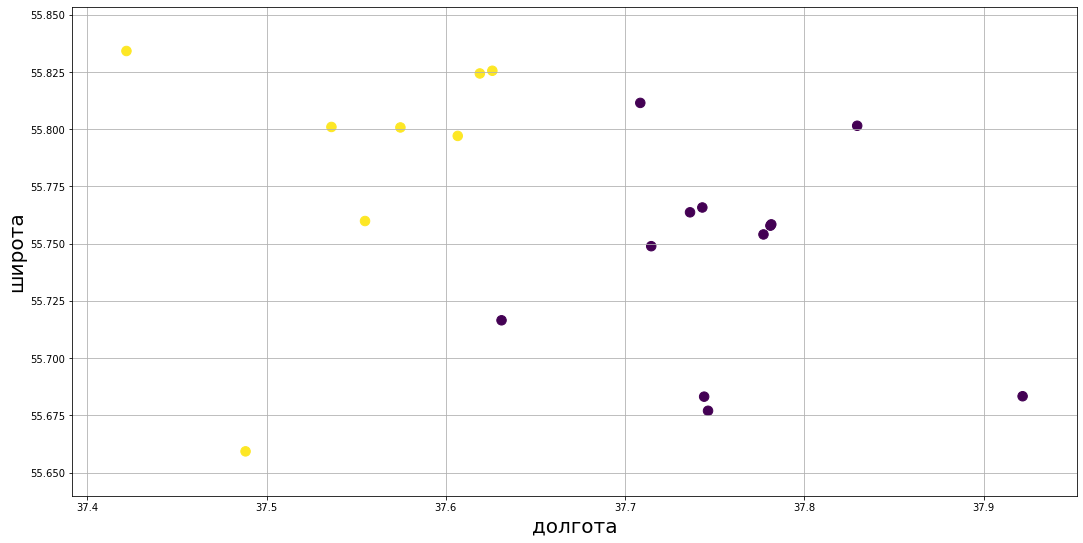

In [15]:
#раскраска точек по их меткам
plt.figure(figsize = (18,9))
plt.scatter(X[:k], Y[:k], c = m3, s =90)
plt.grid()
plt.xlabel('долгота', size = 20)
plt.ylabel('широта', size = 20)

# Функция, которая строит маршрут, получившийся в результате работы одного из алгоритмов

In [16]:
import math

In [17]:
#аргументы на вход

#f_way - последовательность вершин пути
#color_s - цвет стартовой вершины
#color_c -  цвет остальных вершин
#k - количество вершин
#name - название алгоритма

def show_route(f_way, name = "Default", 
               k = 0, color_s = "green", color_c = "skyblue" ):
    
    fig, ax = plt.subplots(figsize = (18,9))
    
    e = 0.0005

    plt.scatter(X[:k], Y[:k], s = 300, color = color_c)
    plt.scatter(X[0], Y[0], s = 550, color = color_s)
    for i in range(0,k):
        dx = X[f_way[i+1]] - X[f_way[i]]
        dy = Y[f_way[i+1]] - Y[f_way[i]]
        koef = dy/dx
        ax.arrow(X[f_way[i]], Y[f_way[i]], dx - e*np.sign(dx), 
                 dy - e*abs(koef)*np.sign(dy), width = 0.001, head_length = 0.006 )
        
    plt.title('\'{}\' для k = \'{}\''.format(name, k), fontsize = 20)    
       
    plt.xlabel('долгота', fontsize=20)
    plt.ylabel('широта', fontsize=20)
    
    plt.show()
    

#что ожидается на выходе
#построенный маршрут с выделенной стартовой точкой и направлением
#указано в заголовке название алгоритма и количество вершин

# Часть 3 Реализация Алгоритма Ближайшего соседа

In [19]:
import math


In [1]:
def NN(k, start = 0, d_matrix = 0, t_matrix = 0):
    
    way = []
    way.append(start)
    
    #заменяем диаганальные элементы на бесконечность
    matrix = t_matrix.copy()
    for i in range(0,k):
        matrix[i,i] = math.inf

    for i in np.arange(1,k):
             idxs=[]
             for j in np.arange(0,k):
                      idxs.append(matrix[way[i-1], j])          
             way.append(idxs.index(min(s)))
             for j in np.arange(0,i):
                      matrix[way[i],way[j]]=float('inf')
                      matrix[way[i],way[j]]=float('inf')
                
    way.append(start)
    
    #стоимость пути считаем по полученной ранее матрице

    S = sum(t_matrix[way[i], way[i+1]] for i in np.arange(0, k-1)) + t_matrix[way[k-1], way[0]]
    return way,  S
    
    




# Тестирование метода ближайших соседей

In [202]:
# фиксируем индексы вершин для тестирования
test_1 = duration_matrix.copy()
k1 = 15
indices = np.arange(0,k1)
test_1 = test_1[np.ix_(indices,indices)]


In [656]:
# фиксируем индексы вершин для тестирования
test_1 = duration_matrix.copy()

#k1 - количество вершин для теста
k1 = 5
indices = np.arange(0,k1)
test_1 = test_1[np.ix_(indices,indices)]
#запускаем алгоритм
import datetime
way = []
Cost = 0
start = timer()
way, cost = NN(k1, start = 0, t_matrix = test_1)
end = timer()
cost = cost
#str(datetime.timedelta(seconds = cost))
#print("Путь - ",way)
print("Продолжительность пути -  ", cost)
print("Время нахождения пути -", round(end-start, 4), 'секунд')
#выводим путь 
#show_route(way, name = "Алгоритм Ближашего соседа", k = k1 )

Продолжительность пути -   8978.0
Время нахождения пути - 0.0002 секунд


In [693]:
#код для получения данных для построения графиков
ctst = [0 for i in range(30)]
time = [0 for i in range(30)]
for i in range(5, 31):
    test_1 = duration_matrix.copy()
    indices = np.arange(0,i)
    test_1 = test_1[np.ix_(indices,indices)]
    #запускаем алгоритм
    import datetime
    way = []
    Cost = 0
    start = timer()
    way, cost = NN(i, start = 0, t_matrix = test_1)
    end = timer()
    cost = cost
    ctst[i-1] = cost
    time[i-1] = end - start
    #str(datetime.timedelta(seconds = cost))
    #print("Путь - ",way)
    #print("Продолжительность пути -  ", cost)
    #print("Время нахождения пути -", round(end-start, 4), 'секунд')
    

#  Реализация метода рекурсивного перебора с оптимизацией

In [150]:
import math

In [34]:
#подготовка данных для запуска алгоритма
pm = duration_matrix.copy()
k_p = 5
indices = np.arange(0,k_p)
pm = pm[np.ix_(indices,indices)]
import datetime
# для пометки пройденных вершин будем использовать used
global used 
used = [False for i in range(k_p)]
#здесь будет храниться итоговый маршрут после работы алгоритма
global way_p
way_p = [0 for i in range(k_p)]
#здесь будет храниться итоговая стоимость пути после работы алгоритма
global cost_p 
cost_p = math.inf

In [35]:
#данная библиотека будет использоваться для фиксирования времени работы алгоритма
import datetime
from timeit import default_timer as timer

In [38]:
way_p_cur = [0 for i in range(k_p)]
start = timer()
PermMethod(1, 0, k_p, pm, way_p_cur)
end = timer()

#закомментированная ниже строка переводит стоимость путеи из секунд в стандартный временной формат
#cost_p = str(datetime.timedelta(seconds = cost_p))

print("Продолжительность пути -  ", cost_p)
print("Время нахождения пути -", round(end-start, 4))
way_p.append(0)

#выводим путь 
#print("Путь - ", way_p)
#show_route(way_p, name = "Рекурсивный метод перестановок", k = k_p )

Продолжительность пути -   8803.0
Время нахождения пути - 0.0002


Продолжительность пути -   4:11:24
Время нахождения пути - 1:21:44


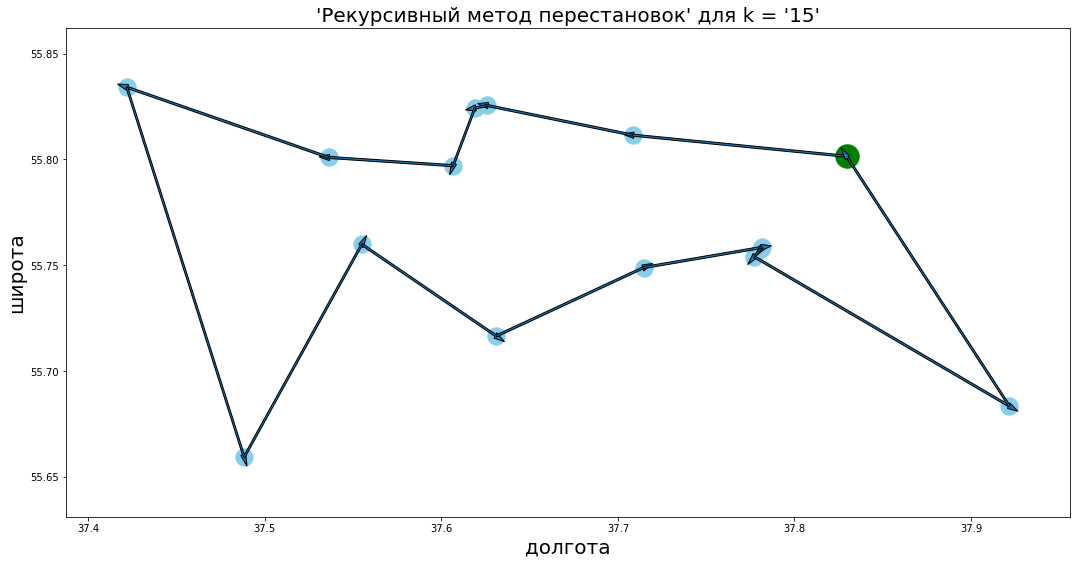

In [39]:
#результат работы программы для k = 15
print("Продолжительность пути -  ", cost_p)
tt = str(datetime.timedelta(seconds = round(end-start,0)))
print("Время нахождения пути -", tt)
show_route(way_p, name = "Рекурсивный метод перестановок", k = k_p )

In [37]:
#функция реализующая сам алгоритм
def PermMethod(pos, cur, k_p, d_m, way_p_cur):
    global way_p
    global used
    global cost_p
    #если длина на каком шаге выходит больше чем текущий оптимальный ответ прекращаем
    if (cur >= cost_p):
        return
    
    if (pos == k_p):
        next_cur = cur + d_m[way_p_cur[pos-1]][0]
        if (next_cur < cost_p):
            cost_p = next_cur
            way_p = way_p_cur.copy()
            #print(way_p)
        return
    
    for i in range(1, k_p):
        if (used[i]):
            continue
            
        way_p_cur[pos] = i
        used[i] = True
        next_cost = cur + d_m[way_p_cur[pos - 1]][i]
        PermMethod(pos + 1, next_cost, k_p, d_m, way_p_cur)
        used[i] = False
        

# Тестирование метода рекурсивного перебора с оптимизацией

In [699]:
#данный код организует сбор данных для построения графиков
ctst = [0 for i in range(14)]
time = [0 for i in range(14)]
for i in range(5, 15):
    print(i)
    test_1 = duration_matrix.copy()
    indices = np.arange(0,i)
    test_1 = test_1[np.ix_(indices,indices)]
    #запускаем алгоритм
    used = [False for j in range(i)]
    way_p = [0 for j in range(i)] 
    way_p_cur = [0 for j in range(i)]
    cost_p = math.inf
    start = timer()
    PermMethod(1, 0, i, test_1, way_p_cur)
    end = timer()
    ctst[i-1] = cost_p
    time[i-1] = end - start
    #str(datetime.timedelta(seconds = cost))
    #print("Путь - ",way)
    #print("Продолжительность пути -  ", cost)
    #print("Время нахождения пути -", round(end-start, 4), 'секунд')

5
6
7
8
9
10
11
12
13
14


# Алгоритм Муравьиной Колонии

In [ ]:
#реализация данного алгоритма основана на https://github.com/Akavall/AntColonyOptimization
#изменена логика обновления матрицы феромонов, теперь она учитывает кратчайшие длины найденных приближённых маршрутов
#изменен способ реализации процесса затухания матрицы феромонов, теперь затухают феромоны накопленные только до предыдущей итерации,
#а феромоны полученные на последней имеют большую значимость

In [21]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        
        #example : ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          

        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path                        
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths:
            for move in path:
                self.pheromone[move] = self.pheromone[move]*self.decay
            
        for path, dist in sorted_paths[:n_best]:
            
            for move in path:
                self.pheromone[move] += 1.0/dist   

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))     
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move


In [22]:
#простой пример
import numpy as np


distances = np.array([[np.inf, 2, 20, 50, 70],
                      [2, np.inf, 4, 8, 2],
                      [2, 4, np.inf, 1, 3],
                      [5, 8, 1, np.inf, 2],
                      [7, 2, 3, 2, np.inf]])

ant_colony = AntColony(distances, 1, 1, 100, 0.95, alpha=1, beta=1)
shortest_path = ant_colony.run()
print ("shorted_path: {}".format(shortest_path))

shorted_path: ([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)


In [28]:
# фиксируем индексы вершин для тестирования
test_1 = duration_matrix.copy()
k1 = 20
indices = np.arange(0,k1)
test_1 = test_1[np.ix_(indices,indices)]

In [29]:
#Для работы алгоритма необходимо чтобы на главной диагонали стояли нули
for i in range(0,k1):
    test_1[i,i] = math.inf

In [30]:
import math
import datetime
from timeit import default_timer as timer

In [31]:
ant_colony = AntColony(test_1, 100, 10, 100, 0.95, alpha=1, beta=1)
start = timer()
shortest_path = ant_colony.run()
end = timer()
way = shortest_path[:-1]
cost_ant = int(shortest_path[-1])
#print ("shorted_path: {}".format(shortest_path))
cost_ant_f = str(datetime.timedelta(seconds = cost_ant))
print("Путь - ",way)
print("Продолжительность пути -  ", cost_ant)
print("Продолжительность пути -  ", cost_ant_f)
print("Время выполнения -", round(end-start, 4))
#выводим путь 
#show_route(way, name = "Алгоритм Ближашего соседа", k = k1 )

Путь -  ([(0, 14), (14, 13), (13, 5), (5, 7), (7, 17), (17, 11), (11, 2), (2, 8), (8, 6), (6, 1), (1, 15), (15, 16), (16, 12), (12, 9), (9, 3), (3, 10), (10, 19), (19, 18), (18, 4), (4, 0)],)
Продолжительность пути -   17831
Продолжительность пути -   4:57:11
Время выполнения - 9.8007


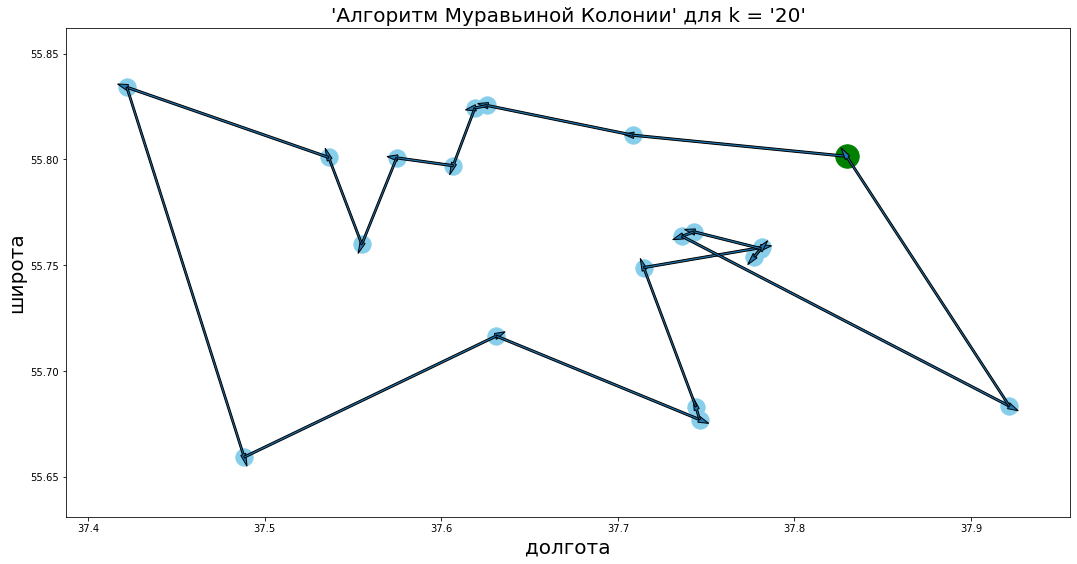

In [32]:
#на графике строим
way_ant = []
for i in range(0,k1):
    way_ant.append(way[0][i][0])
way_ant.append(0)
show_route(way_ant, name = "Алгоритм Муравьиной Колонии", k = k1 )

In [33]:
#код ниже прдназначен для получения данных для построения графиков

In [702]:
ctst = [0 for i in range(20)]
time = [0 for i in range(20)]
for i in range(5, 21):
    print(i)
    test_1 = duration_matrix.copy()
    indices = np.arange(0,i)
    test_1 = test_1[np.ix_(indices,indices)]
    for j in range(0,i):
        test_1[j,j] = math.inf
    #запускаем алгоритм
    ant_colony = AntColony(test_1, 100, 10, 100, 0.95, alpha=1, beta=1)
    start = timer()
    shortest_path = ant_colony.run()
    end = timer()
    cost = int(shortest_path[-1])
    ctst[i-1] = cost
    time[i-1] = end - start
    #str(datetime.timedelta(seconds = cost))
    #print("Путь - ",way)
    #print("Продолжительность пути -  ", cost)
    #print("Время нахождения пути -", round(end-start, 4), 'секунд')
    

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


# Генетический алгоритм

In [ ]:
#данный алгоритм реализован используя библиотеку генетических алгоритмов Python Deap а также код приведенный на ресурсе:
#https://github.com/pepper-johnson/sack_lunch/tree/master/Notebooks/GA
#с незначительными изменениями(к маршруту добавляется путь из конечной точки маршрута в исходную и фитнесс функция 
# считает суммарную стоимость замкнутого пути

In [41]:
import string
import random
import numpy as np
from deap import base, creator, tools

In [51]:
class Runner:   
    def __init__(self, toolbox):
        self.toolbox = toolbox
        self.set_parameters(10, 5, 2)
        
    def set_parameters(self, population_size, iterations, n_matings):
        self.iterations = iterations
        self.population_size = population_size
        self.n_matings = n_matings
        
    def set_fitness(self, population):
        fitnesses = [ 
            (individual, self.toolbox.evaluate(individual)) 
            for individual in population 
        ]

        for individual, fitness in fitnesses:
            individual.fitness.values = (fitness,)
            
    def get_offspring(self, population):
        n = len(population)
        for _ in range(self.n_matings):
            i1, i2 = np.random.choice(range(n), size=2, replace=False)

            offspring1, offspring2 = \
                self.toolbox.mate(population[i1], population[i2])
            
            yield self.toolbox.mutate(offspring1)[0]
            yield self.toolbox.mutate(offspring2)[0]
    
    @staticmethod
    def pull_stats(population, iteration=1):
        fitnesses = [ individual.fitness.values[0] for individual in population ]
        return {
            'i': iteration,
            'mu': np.mean(fitnesses),
            'std': np.std(fitnesses),
            'max': np.max(fitnesses),
            'min': np.min(fitnesses)
        }  
    
    def Run(self):
        population = self.toolbox.population(n=self.population_size)
        self.set_fitness(population)
        
        stats = []
        for iteration in list(range(1, self.iterations + 1)):
            current_population = list(map(self.toolbox.clone, population))
            offspring = list(self.get_offspring(current_population))            
            for child in offspring:
                current_population.append(child)
            
            ## reset fitness,
            self.set_fitness(current_population)
            
            population[:] = self.toolbox.select(current_population, len(population))
            stats.append(
                Runner.pull_stats(population, iteration))
            
        return stats, population

In [52]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/opt/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [53]:
k_g = 15
cities = [str(i) for i in range(0,k_g)]

# фиксируем индексы вершин для тестирования
test_g = duration_matrix.copy()
indices = np.arange(0,k_g)
test_g = test_g[np.ix_(indices,indices)]

In [54]:
# globals,
random.seed(11);
np.random.seed(121);
INDIVIDUAL_SIZE = NUMBER_OF_CITIES = k_g
POPULATION_SIZE = 300
N_ITERATIONS = 500
N_MATINGS = 100
distances = test_g

In [55]:
toolbox = base.Toolbox()

## permutation setup for individual,
toolbox.register("indices", random.sample, range(INDIVIDUAL_SIZE), INDIVIDUAL_SIZE)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

## population setup,
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [56]:
def EVALUATE(individual):
    summation = 0
    start = individual[0]
    for i in range(1, len(individual)):
        end = individual[i]
        summation += distances[start][end]
        start = end     
    summation += distances[individual[-1]][individual[0]]
    return summation

toolbox.register("evaluate", EVALUATE)

In [57]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.01)
toolbox.register("select", tools.selTournament, tournsize=10)
#toolbox.register("select", tools.selBest)

In [58]:
import math
import datetime
from timeit import default_timer as timer

In [59]:
a = Runner(toolbox)
a.set_parameters(POPULATION_SIZE, N_ITERATIONS, N_MATINGS)
starting = timer()
stats, population = a.Run()
ending = timer()

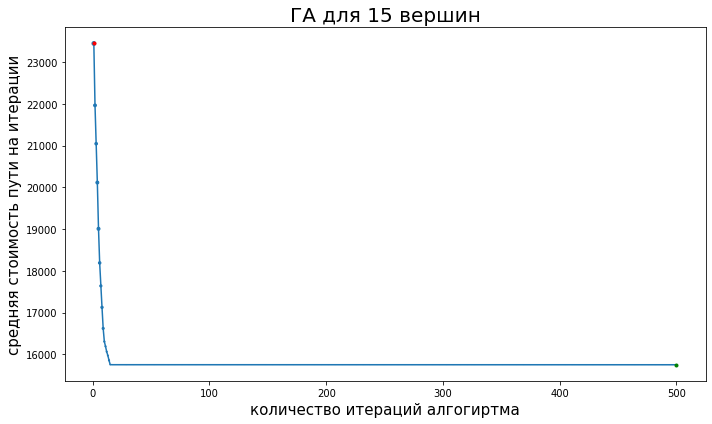

Продолжительность найденного оптимального пути:  4:22:33
Время нахождения пути:  9.4915 секунд


In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

_ = plt.scatter([ s['i'] for s in stats ], [ s['mu'] for s in stats ], marker='.', s=[ (s['std'] + 1) / 20 for s in stats ])
_ = plt.plot([ s['i'] for s in stats ], [ s['mu'] for s in stats ] )
#_ = plt.title('Метод выбора k лучших', fontsize = 20)
_ = plt.title('ГА для 15 вершин', fontsize = 20)

_ = plt.xlabel('количество итераций алгогиртма', fontsize = 15)
_ = plt.ylabel('средняя стоимость пути на итерации', fontsize = 15)

_ = plt.plot(stats[0]['i'], stats[0]['mu'], marker='.', color='red')
_ = plt.plot(stats[-1]['i'], stats[-1]['mu'], marker='.', color='green')

plt.tight_layout()
plt.show()
fitnesses = sorted([ 
    (i, toolbox.evaluate(individual)) 
    for i, individual in enumerate(population) 
], key=lambda x: x[1])

time_of_work = ending-starting
costt = fitnesses[0][1] 
#costt = fitnesses[0][1] + test_g[population[0][-1]][population[0][0]]
costt = str(datetime.timedelta(seconds = costt))
print('Продолжительность найденного оптимального пути: ', costt)
print('Время нахождения пути: ', round(time_of_work,4), 'секунд')



In [706]:
#данный код предназначен для сбора данных для построения графиков
ctst = [0 for i in range(20)]
time = [0 for i in range(20)]
for i in range(5, 21):
    print(i)
    test_1 = duration_matrix.copy()
    indices = np.arange(0,i)
    test_1 = test_1[np.ix_(indices,indices)]
       
    #глобальные
    cities = [str(i) for i in range(0,i)]
    random.seed(11);
    np.random.seed(121);
    POPULATION_SIZE = 300
    N_ITERATIONS = 500
    N_MATINGS = 100
    INDIVIDUAL_SIZE = NUMBER_OF_CITIES = i
    distances = test_1
    
    
    toolbox = base.Toolbox()

    ## permutation setup for individual,
    toolbox.register("indices", random.sample, range(INDIVIDUAL_SIZE), INDIVIDUAL_SIZE)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

    ## population setup,
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", EVALUATE)
    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.01)
    toolbox.register("select", tools.selTournament, tournsize=10)
    
    
    a = Runner(toolbox)
    a.set_parameters(POPULATION_SIZE, N_ITERATIONS, N_MATINGS)
    starting = timer()
    stats, population = a.Run()
    ending = timer()
    fitnesses = sorted([ 
    (i, toolbox.evaluate(individual)) 
    for i, individual in enumerate(population) 
    ], key=lambda x: x[1])
    costt = fitnesses[0][1]

    ctst[i-1] = costt
    time[i-1] = ending - starting
    #str(datetime.timedelta(seconds = cost))
    #print("Путь - ",way)
    #print("Продолжительность пути -  ", cost)
    #print("Время нахождения пути -", round(end-start, 4), 'секунд')

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


# Сегментация точек доставки для нескольких доставщиков

In [96]:
segm_d = duration_matrix.copy()
X_segm = X.copy()
Y_segm = Y.copy()

In [97]:
goods = []

In [98]:
for i in range(0, len(X)):
    if X[i] > 37.3 and X[i] < 40:
        goods.append(i)

In [99]:
segm_d = segm_d[np.ix_(goods, goods)]
X_segm = X_segm[goods]
Y_segm = Y_segm[goods]

In [62]:
#пример сегментирования для 100 точек

In [104]:
segmentatin = segm_d[:100, :100]

In [112]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters = 6, random_state=0).fit(segmentatin)
m3 = kmeans.labels_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Text(0, 0.5, 'широта')

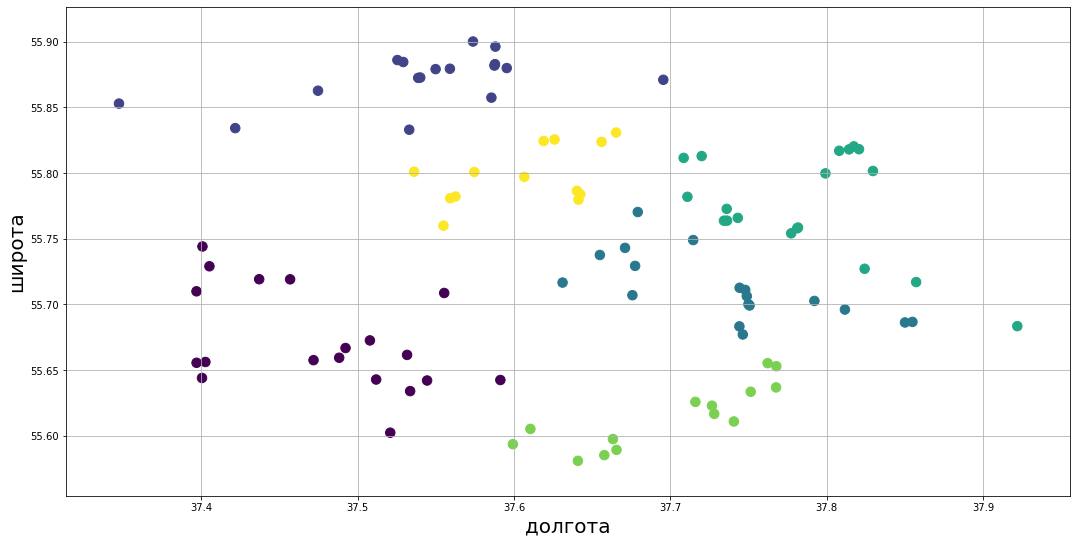

In [113]:
#раскраска точек по их меткам
plt.figure(figsize = (18,9))
plt.scatter(X_segm[:100], Y_segm[:100], c = m3, s =90)
plt.grid()
plt.xlabel('долгота', size = 20)
plt.ylabel('широта', size = 20)